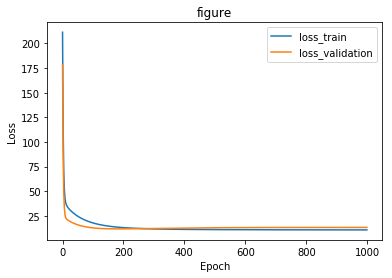

10.7078150891
13.2212819071


In [1]:
from sklearn import datasets 
import numpy as np
from scipy.sparse import csr_matrix, hstack
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



def data_loader(file):
    X,Y = datasets.load_svmlight_file(file)
    one = np.ones((X.shape[0],1))
    X = hstack( [X, csr_matrix(one)] ).toarray()
    Y = np.array(Y).reshape(X.shape[0],1)
    return X, Y

def train(X_train, Y_train, theta, learning_rate):
    gradient = np.dot(X_train.transpose(), X_train.dot(theta) - Y_train )
    theta -= learning_rate * gradient
    return theta

def loss_function(X_test, Y_test, theta):
    Y_prediction = X_test.dot(theta)
    loss = 0.5/X_test.shape[0] * np.dot((Y_test - Y_prediction).transpose(), (Y_test - Y_prediction) ).sum()
    return loss

def plt_loss(epoch, learning_rate):
    X, Y = data_loader('housing.txt')
    theta = np.zeros((X.shape[1], 1))
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
    train_loss = []
    test_loss = []
    for episode in range(epoch):      
        theta = train(X_train, Y_train, theta, learning_rate)
        Loss = loss_function(X_train, Y_train, theta)
        train_loss.append(Loss)
        loss = loss_function(X_test, Y_test, theta)
        test_loss.append(loss)       
    plt.title('figure')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(train_loss, label="loss_train")
    plt.plot(test_loss, label="loss_validation")
    plt.legend(loc='upper right')
    plt.show()
    print(Loss)
    print(loss)

if __name__ =="__main__":
    plt_loss(epoch=1000, learning_rate=0.0001)
